In [2]:
import tensorflow as tf

In [3]:
# 1. MNIST 데이터넷 임포트
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


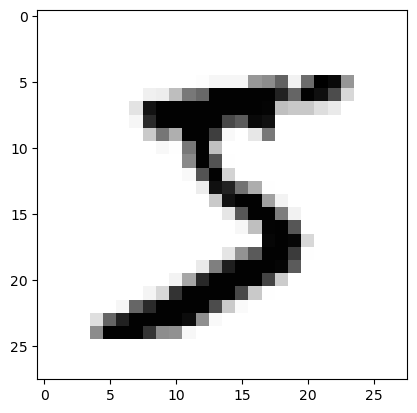

In [4]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys
# 0번째 원소의 모든 데이터를 출력
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# 1.  MNIST 데이터셋 임코트
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
X_train[59999]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
X_train[60000]
#   # 60000번 이후 데이터 없음

IndexError: index 60000 is out of bounds for axis 0 with size 60000

In [13]:
# 3. 모델 구성
# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, re
model = Sequential()
model.add(Dense(512, input_dim=(28*28), activation='relu'))
model.add(Dense(10, activation='softmax'))


# 4. 모델 훈련
# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 sparse_categorical_crossentropy, 옵티마이저는
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


# 5. 모델 훈련                      steps_per_epoch=50, validation_steps=50,
# verbose: Integer. 0, 1, or 2. 
# Verbosity mode.   
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=50,
                    validation_steps=50,
                    epochs=50,
                    verbose=1)

Epoch 1/50
50/50 [==============================] - 3s 47ms/step - loss: 0.5899 - accuracy: 0.8450 - val_loss: 0.2704 - val_accuracy: 0.9243
Epoch 2/50
50/50 [==============================] - 2s 39ms/step - loss: 0.2401 - accuracy: 0.9324 - val_loss: 0.2044 - val_accuracy: 0.9409
Epoch 3/50
50/50 [==============================] - 2s 39ms/step - loss: 0.1827 - accuracy: 0.9492 - val_loss: 0.1628 - val_accuracy: 0.9537
Epoch 4/50
50/50 [==============================] - 2s 38ms/step - loss: 0.1472 - accuracy: 0.9597 - val_loss: 0.1380 - val_accuracy: 0.9595
Epoch 5/50
50/50 [==============================] - 2s 39ms/step - loss: 0.1232 - accuracy: 0.9659 - val_loss: 0.1236 - val_accuracy: 0.9644
Epoch 6/50
50/50 [==============================] - 2s 39ms/step - loss: 0.1047 - accuracy: 0.9715 - val_loss: 0.1073 - val_accuracy: 0.9679
Epoch 7/50
50/50 [==============================] - 2s 32ms/step - loss: 0.0891 - accuracy: 0.9763 - val_loss: 0.0991 - val_accuracy: 0.9705
Epoch 8/50
50

In [14]:
# 6. 모델 저장
model.save('Predict_model.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


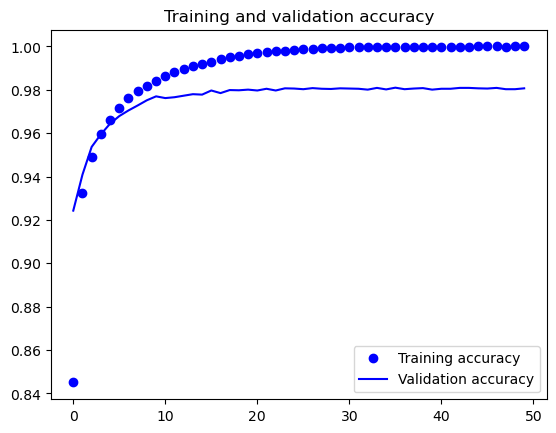

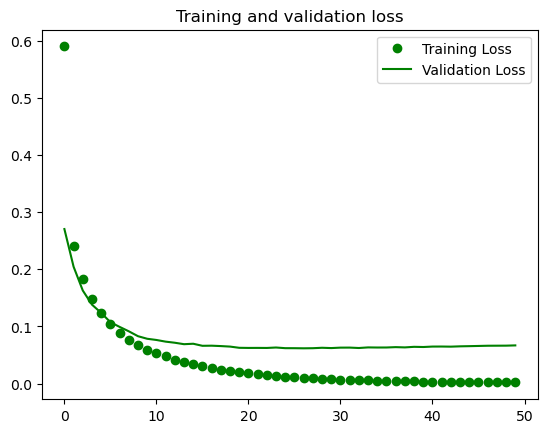

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
import cv2
import numpy as np

In [25]:
X_pred = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)
#X_pred.shape

In [26]:
X2_pred = ((np.array(X_pred) / 255) - 1) * -1

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [24]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X2_pred, cmap='Greys')
plt.show()

import sys
# 0번째 원소의 모든 데이터를 출력
for x in X2_pred:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')


NameError: name 'X2_pred' is not defined

In [ ]:
X2_pred = X2_pred.reshape(-1, 28*28)
X2_pred.shape

In [ ]:
# 모델 불러오기
model = load_model('Predict_Model.h5')

In [ ]:
res =(model.predict(X2_pred) > 0.5).astype("int32")
print(res)

In [ ]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np
# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("2.png").convert("L")
# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))
# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1
# 모델 불러오기
model = load_model('Predict_Model.h5')
# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res = model.predict(test_data)
print(res)
